In [1]:
import pandas as pd
import gzip
import json
import csv
import sys
import numpy as np
import time
from collections import defaultdict
from glob import glob
import gensim 
from gensim.models import Word2Vec 
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
import pyarrow
sys.path.append('./aws-glue-libs')
warnings.filterwarnings(action = 'ignore') 

In [4]:
# !conda activate dse_env
from pyspark import SparkContext
from pyspark.sql import *

sc = SparkContext(master="local[3]")
sqlContext = SQLContext(sc)

DATA_DIR = './data/'
TABLE_NAME = 'landingZone/'
FILE_NAME = 'meta_Clothing_Shoes_and_Jewelry.json.gz'
PATH = DATA_DIR + TABLE_NAME + FILE_NAME

In [5]:
def readGz(f):
    for l in gzip.open(f):
        yield eval(l)

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')


In [ ]:
AWS_PROFILE = 'ucsd'
AWS_REGION = 'us-east-1'
AWS_ACCESS_KEY = 
AWS_SECRET_ACCESS_KEY = 
BUCKET_NAME = 
DATA_LAKE_SCHEMA = {
    "dse-cohort5-group1": {
        "data-lake-landing-zone": {
            "meta_Clothing_Shoes_and_Jewelry.json.gz",
            "Clothing_Shoes_and_Jewelry_5.json.gz",
            "reviews_Clothing_Shoes_and_Jewelry_5.json.gz"
        }
        "data-lake-standardization-zone": {
            "metaData.parquet": {}
        }
    }
}


In [1]:
from pyspark.sql import Row
class DataLake:
    def __init__(self):
        self.AWS_PROFILE = os.environ["AWS_PROFILE"]
        self.AWS_REGION = os.environ["AWS_REGION"]
        self.AWS_ACCESS_KEY = os.environ["AWS_ACCESS_KEY"]
        self.AWS_SECRET_ACCESS_KEY = os.environ["AWS_SECRET_ACCESS_KEY"]
        

    def generateFileName(self, folder, main_cat, sub_cat, gen_cat):
        self.DB_NAME = folder
        self.TABLE_NAME = main_cat
        self.SUB_CAT = sub_cat
        self.GEN_CAT = gen_cat
        self.FILE_NAME = '{s}_{g}.parquet'.format(s=self.SUB_CAT, g=self.GEN_CAT)
    
        self.PATH = './{d}/{f}/main_cat={m}/sub_cat={s}/gen_cat={g}/{fn}'.format(
            m=self.TABLE_NAME, 
            s=self.SUB_CAT, 
            d=self.BUCKET_NAME,
            f=self.DB_NAME,
            fn=self.FILE_NAME,
            g=self.GEN_CAT
        )
        
        return self.PATH
    
    def toJson(data):
        return json.loads(data)

    def parseCategory(d, main, sub, g):
        d['main_cat'] = main
        d['sub_cat'] = sub
        d['gender'] = g
        return d
    
    def genRDD(self, fn, main_cat, sub_cat, gen_cat):
        PATH = './{b}/{t}/{f}'.format(
            t='landingZone', 
            b=self.BUCKET_NAME,
            f=fn
        )
        
        self.data = self.sc.textFile(PATH)
        return self.data
        

        
        

DL = DataLake()

NameError: name 'sc' is not defined

In [6]:
import datetime

year = 2019

filename = './{d}/{f}/main_cat={m}/{fn}'.format(
    m='Clothing, Shoes & Jewelry', 
    s='reviews.parquet', 
    d='dataa',
    f='standardizationZone',
    t='reviews',
    fn='reviews.parquet'
)

def parseDate(d):
    d['unixReviewTime'] = datetime.datetime.utcfromtimestamp(d['unixReviewTime'])
    d['year'] = d['unixReviewTime'].year
    d['month'] = d['unixReviewTime'].month
    d['day'] = d['unixReviewTime'].day
    return d
    
reviewsRDD = rdd.map(lambda a: toJson(a)).map(lambda a: parseDate(a)).filter(lambda x: "year" == year)
reviewsRDD.take(3)

{'category': ['Clothing, Shoes & Jewelry', 'Women', 'Shoes', 'Sandals', 'Flip-Flops', 'synthetic-and-fabric', 'Imported', 'Heel Height: 11cm=4.33",Platform: 5.5cm=2.17"', 'Material:EVA and cloth', 'Choose the usual size you wear, if you like loose, you could choos one size plus.', 'EVA rubber sole,comfortable,Handmade special occasion sandals'], 'fit': ' class="a-normal a-align-center a-spacing-small">\n                    \n                        <tr class="a-histogram-row">\n                            <td class="a-span3 a-nowrap">\n                                <span class="a-color-secondary">\n                                    Too small\n                                </span>\n                            </td>\n                            <td class="a-span7">\n                                <div class="a-meter" aria-label="21%"><div class="a-meter-bar" style="width: 21%;"></div></div>\n                            </td>\n                            <td class="a-span2 a-nowrap

[{'category': ['Clothing, Shoes & Jewelry',
   'Costumes & Accessories',
   'Kids & Baby',
   'Girls',
   'Accessories',
   '3 layers of tulle',
   '6" long, stretched waist measures 11 1/2" across. Fits up to 7 years.',
   'Sequins line the edge of the tulle on the top layer.',
   'Great for babys up to about age 7',
   'Makes a Great gift for any princess'],
  'description': ['6" long, stretched waist measures 11 1/2" across. Fits up to 7 years.'],
  'title': 'Purple Sequin Tiny Dancer Tutu Ballet Dance Fairy Princess Costume Accessory',
  'brand': 'Big Dreams',
  'feature': ['3 layers of tulle',
   '6" long, stretched waist measures 11 1/2" across. Fits up to 7 years.',
   'Sequins line the edge of the tulle on the top layer.',
   'Great for babys up to about age 7',
   'Makes a Great gift for any princess'],
  'rank': '19,963,069inClothing,ShoesJewelry(',
  'date': '5 star5 star (0%)',
  'asin': '0000037214'},
 {'category': ['Clothing, Shoes & Jewelry',
   'Luggage & Travel Gear',


,productId,data,id
0,0000037214,"{'category': ['Clothing, Shoes & Jewelry', 'Co...",None
1,0201377179,"{'category': ['Clothing, Shoes & Jewelry', 'Lu...",None
2,0204444454,"{'category': ['Clothing, Shoes & Jewelry', 'Lu...",None
3,0204444403,"{'category': ['Clothing, Shoes & Jewelry', 'Lu...",None
4,0206313535,"{'category': ['Clothing, Shoes & Jewelry', 'No...",None
...,...,...,...
2681352,B01HJHQR1W,"{'category': ['Clothing, Shoes & Jewelry', 'No...",None
2681353,B01HJH8JBI,"{'category': ['Clothing, Shoes & Jewelry', 'Me...",None
2681354,B01HJHFS58,"{'category': ['Clothing, Shoes & Jewelry', 'Wo...",None
2681355,2,None,None


In [419]:
DATA_DIR = './dataa/landingZone/'
FILE_NAME = 'reviews_Clothing_Shoes_and_Jewelry_5.json.gz'
PATH = DATA_DIR + FILE_NAME

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')


df = getDF(PATH)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1KLRMWW2FWPL4,0000031887,"Amazon Customer ""cameramom""","[0, 0]",This is a great tutu and at a really great pri...,5.0,Great tutu- not cheaply made,1297468800,"02 12, 2011"
1,A2G5TCU2WDFZ65,0000031887,Amazon Customer,"[0, 0]",I bought this for my 4 yr old daughter for dan...,5.0,Very Cute!!,1358553600,"01 19, 2013"
2,A1RLQXYNCMWRWN,0000031887,Carola,"[0, 0]",What can I say... my daughters have it in oran...,5.0,I have buy more than one,1357257600,"01 4, 2013"
3,A8U3FAMSJVHS5,0000031887,Caromcg,"[0, 0]","We bought several tutus at once, and they are ...",5.0,"Adorable, Sturdy",1398556800,"04 27, 2014"
4,A3GEOILWLK86XM,0000031887,CJ,"[0, 0]",Thank you Halo Heaven great product for Little...,5.0,Grammy's Angels Love it,1394841600,"03 15, 2014"


In [339]:
# db = './dataa/standardizationZone/meta.parquet.gzip'
# productsDF.to_parquet(db, compression='gzip', partition_cols=['productId'])
# productsDF.to_pickle(dbp)
# productsDF.to_pickle("./dataa/standardizationZone/{}.pkl".format('meta'))
DATA_DIR = './dataa/landingZone/'
FILE_NAME = 'reviews_Clothing_Shoes_and_Jewelry_5.json.gz'
PATH = DATA_DIR + FILE_NAME

year = 2012
reviewsList = []
i = 0
for l in readGz(PATH):
    l['reviewTime'] = pd.to_datetime(l['reviewTime'])
    l['year'] = l['reviewTime'].year
    if l['year'] != year:
        continue
    else:
        l['month'] = l['reviewTime'].month
        l['day'] = l['reviewTime'].day
        # filename="./dataa/processedData/reviews/reviews.parquet"
# ndf.write.parquet(filename, mode='overwrite', partitionBy=['year', 'month', 'day'], compression='gzip')

        reviewsList.append(l)
    
reviewsList

[{'reviewerID': 'A2M2APVYIB2U6K',
  'asin': '0000031887',
  'reviewerName': 'Jamie P.',
  'helpful': [0, 0],
  'reviewText': "Great tutu for a great price. It isn't a &#34;full&#34; or high quality skirt, but it is perfect for my daughter to wear over leggings for her little outfits.",
  'overall': 5.0,
  'summary': 'Great value',
  'unixReviewTime': 1356220800,
  'reviewTime': Timestamp('2012-12-23 00:00:00'),
  'year': 2012,
  'month': 12,
  'day': 23},
 {'reviewerID': 'A3EERSWHAI6SO',
  'asin': '0000031887',
  'reviewerName': 'Jeffrey Hollingshead "Jillian hollingshead"',
  'helpful': [7, 8],
  'reviewText': 'For what I paid for two tutus is unbeatable anywhere!  I ordered a pink and turquios and they are vibrant and beautiful! The tutu is very full! Princess style! Not cheaply made! Not cheap materia! Obviously someone made these with love and care! I paid less than 7 bucks for a tutu I and I feel proud of my self for researching to the point of finding gold!Recommend 2-6 years!My 

In [450]:
filename="./dataa/processedData/reviews/reviews.parquet"

df['reviewTime'] = pd.to_datetime(df['reviewTime'])
df['year'] = [row.year for row in df['reviewTime']]
df['month'] = [row.month for row in df['reviewTime']]
df['day'] = [row.day for row in df['reviewTime']]


df.to_parquet(filename, compression='gzip', partition_cols=['year', 'month', 'day'])
# reviewsDF = sqlContext.createDataFrame(df)
# reviewsDF.write.partitionBy(['year', 'month', 'day']).mode("append").parquet(filename)


In [451]:
# reviewsDF.to_parquet("./dataa/processedData/", root_path='reviews', compression='gzip', partition_cols=['year', 'month', 'day'])
# dataset = pq.ParquetDataset("./dataa/processedData")
# table = dataset.read(root_path='reviews')
# table
# reviewsDF.createOrReplaceTempView('reviews_reviews')
# filename=data_dir+'/decon_%s_%s.parquet'%(state,meas)

pqdf=sqlContext.read.parquet(filename)
print(pqdf.count())


sqlContext.registerDataFrameAsTable(pqdf,'reviews')
Query="SELECT * FROM reviews\n\t"
ndf = sqlContext.sql(Query)

# filename="./dataa/processedData/reviews/reviews.parquet"
# ndf.write.parquet(filename, mode='overwrite', partitionBy=['year', 'month', 'day'], compression='gzip')

278677


In [454]:
filename = './{bucket}/{DB}/{table}'.format(
    bucket=DL.BUCKET_NAME,
    table='Clothing_Shoes_and_Jewelry_5.json.gz', 
    DB='landingZone'
)

rdd = sc.textFile(filename)

year = 2012

def parseDate(d):
    unixt = datetime.datetime.utcfromtimestamp(d['unixReviewTime'])
    d['year'] = unixt.year
    d['month'] = unixt.month
    d['day'] = unixt.day
    return d
    
reviewsRDD = rdd.map(lambda a: toJson(a)).map(lambda a: parseDate(a)).filter(lambda a: a['year'] == year)
reviewsRDD.take(5)

reviewsDF = sqlContext.createDataFrame(reviewsRDD)
filename = './{bucket}/{DB}/main_cat={category}/{table}/year={y}/'.format(
    bucket=DL.BUCKET_NAME,
    category='Clothing, Shoes & Jewelry', 
    table='reviews.parquet', 
    DB='standardizationZone',
    y = str(year)
)

reviewsDF.write.partitionBy('year', 'month', 'day').parquet(filename)

,category,description,title,brand,feature,rank,date,asin,image,also_view,price,fit,also_buy,main_cat,tech1,details,similar_item,tech2
0,"[Clothing, Shoes & Jewelry, Costumes & Accesso...","[6"" long, stretched waist measures 11 1/2"" acr...",Purple Sequin Tiny Dancer Tutu Ballet Dance Fa...,Big Dreams,"[3 layers of tulle, 6"" long, stretched waist m...","19,963,069inClothing,ShoesJewelry(",5 star5 star (0%),0000037214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[Clothing, Shoes & Jewelry, Luggage & Travel G...",[The Hottest Bag in Town! Brand: Anello Condit...,Japan Anello Backpack Unisex LARGE LIGHT GRAY ...,Anello,"[Polyester Canvas Waterproof, Imported, Size: ...","4,537,420inClothing,ShoesJewelry(",5 star,0201377179,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[Clothing, Shoes & Jewelry, Luggage & Travel G...",[The Hottest Bag in Town! Brand: Anello Condit...,Japan Anello Backpack Unisex PINK BEIGE LARGE ...,Anello,"[PU Leather, Imported, Size: Large PU Leather ...","3,994,472inClothing,ShoesJewelry(",5 star,0204444454,[https://images-na.ssl-images-amazon.com/image...,"[B07CJF5HLR, B01EBI8UH6, B01N1LR908, B074M4QKG...",$70.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[Clothing, Shoes & Jewelry, Luggage & Travel G...",[The Hottest Bag in Town! Brand: Anello Condit...,Japan Anello Backpack Unisex BLACK LARGE PU LE...,Anello,"[PU Leather, Imported, Size: Large PU Leather ...","635,761inClothing,ShoesJewelry(",5 star,0204444403,[https://images-na.ssl-images-amazon.com/image...,"[B01DLVYOPG, B07CJF5HLR, B01MSS59Y6, B071YBC1J...",$65.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[Clothing, Shoes & Jewelry, Novelty & More, Cl...",[Brand New. Hat Centre Length: adult about 8c...,bettyhome Unisex Adult Winter Spring Thicken C...,bettyhome,"[Imported, Plush,Cotton, Polyester, Lovely for...","5,061,041inClothing,ShoesJewelry(",5 star5 star (0%),0206313535,[https://images-na.ssl-images-amazon.com/image...,"[B00VGT93YS, B07FTY87LM, B01IKVOY8E, B01GF6C6F...",$18.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [461]:
def packArray(a):
    """
    pack a numpy array into a bytearray that can be stored as a single 
    field in a spark DataFrame

    :param a: a numpy ndarray 
    :returns: a bytearray
    :rtype:

    """
    if type(a)!=np.ndarray:
        raise Exception("input to packArray should be numpy.ndarray. It is instead "+str(type(a)))
    return bytearray(a.tobytes())

packed = packArray(metaDF['category'])
packed

Exception: input to packArray should be numpy.ndarray. It is instead <class 'pandas.core.series.Series'>

In [464]:
%%time
!aws s3 cp './data/standardizationZone/' 's3://dse-cohort5-group1/data-lake-standardization-zone/metaData.parquet' --recursive --profile=ucsd --region=us-east-1


/Users/justin.shamoun/anaconda/envs/dse_env/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


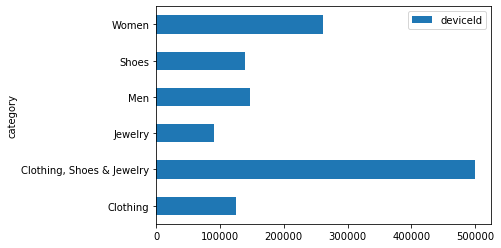

In [659]:
# from pyspark import SparkContext
# from pyspark.sql import *
# sc = SparkContext(master="local[3]")
# sqlContext = SQLContext(sc)
# dd.groupby([]count()
dd.columns = ['deviceId', 'category']
ddg = dd.groupby(['category']).count()
ddg2 = ddg[ddg['deviceId'].sort_values(ascending=False)/ddg['deviceId'].max() > .1]

# filt = ddg['deviceId'].sort()
ddg2.plot.barh()


category
Clothing, Shoes & Jewelry                               True
Women                                                   True
Men                                                    False
Shoes                                                  False
Clothing                                               False
                                                       ...  
Officially Licensed Big Bang Theory Merchandise        False
Officially Licensed Big Bang Theory T-Shirt            False
Officially Licensed Billy Idol Merchandise             False
Officially Licensed Black Label Society Merchandise    False
Lace lock for added style and security                 False
Name: deviceId, Length: 383661, dtype: bool

In [357]:
def getTables(Data_dir="./dataa/processedData"):
    Tables = {}
    filenames = glob(Data_dir + "/*.parquet.gzip")
    i = 0
    for fname in filenames:
        print(fname)
        dataset = pq.ParquetDataset(fname)
        Tables[i] = dataset.read()
        i += 1
    return Tables


d = getTables()
d
df=sqlContext.read.parquet(data_dir/NY.parquet)

./dataa/processedData/reviews_2012.parquet.gzip
./dataa/processedData/reviews_2011.parquet.gzip


{0: pyarrow.Table
 reviewerID: string
 asin: string
 reviewerName: string
 helpful: list<item: int64>
   child 0, item: int64
 reviewText: string
 overall: double
 summary: string
 unixReviewTime: int64
 reviewTime: timestamp[ms]
 year: dictionary<values=int64, indices=int32, ordered=0>
 month: dictionary<values=int64, indices=int32, ordered=0>
 day: dictionary<values=int64, indices=int32, ordered=0>
 metadata
 --------
 OrderedDict([(b'pandas',
               b'{"index_columns": [], "column_indexes": [], "columns": [{"na'
               b'me": "reviewerID", "field_name": "reviewerID", "pandas_type"'
               b': "unicode", "numpy_type": "object", "metadata": null}, {"na'
               b'me": "asin", "field_name": "asin", "pandas_type": "unicode",'
               b' "numpy_type": "object", "metadata": null}, {"name": "review'
               b'erName", "field_name": "reviewerName", "pandas_type": "unico'
               b'de", "numpy_type": "object", "metadata": null}, {"name": "h

In [344]:
d[1]['reviewTime']


[
  [
    2011-01-01 00:00:00.000,
    2011-01-01 00:00:00.000,
    2011-01-01 00:00:00.000,
    2011-01-01 00:00:00.000,
    2011-01-01 00:00:00.000,
    2011-01-01 00:00:00.000,
    2011-01-01 00:00:00.000,
    2011-01-01 00:00:00.000
  ],
  [
    2011-01-10 00:00:00.000,
    2011-01-10 00:00:00.000,
    2011-01-10 00:00:00.000,
    2011-01-10 00:00:00.000,
    2011-01-10 00:00:00.000,
    2011-01-10 00:00:00.000,
    2011-01-10 00:00:00.000,
    2011-01-10 00:00:00.000,
    2011-01-10 00:00:00.000,
    2011-01-10 00:00:00.000,
    ...
    2011-01-10 00:00:00.000,
    2011-01-10 00:00:00.000,
    2011-01-10 00:00:00.000,
    2011-01-10 00:00:00.000,
    2011-01-10 00:00:00.000,
    2011-01-10 00:00:00.000,
    2011-01-10 00:00:00.000,
    2011-01-10 00:00:00.000,
    2011-01-10 00:00:00.000,
    2011-01-10 00:00:00.000
  ],
  [
    2011-01-11 00:00:00.000,
    2011-01-11 00:00:00.000,
    2011-01-11 00:00:00.000,
    2011-01-11 00:00:00.000,
    2011-01-11 00:00:00.000,
    2011-01-1

In [102]:
df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [97]:
import pickle
df.to_pickle("./data/{}.pkl".format('all'))
TickerInfo=D['TickerInfo']
        Tickers=D['Tickers']
reviewsDF
metaDF2
def getTables(Data_dir='./data'):
    Tables = {}
# #     exclude = ['2012']
# #     tfid_result_df.to_pickle("./preped_{}_max_feature{}.pkl".format('tfid_result_df', '100'))
    filenames = glob(Data_dir + "/r.pkl")
    
    for fname in filenames:
    D=pickle.load(open(fname,'rb'))
        TickerInfo=D['TickerInfo']
        Tickers=D['Tickers']

        Tables[D]
        return D


d = getTables()
d

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,year,month,day
0,A1KLRMWW2FWPL4,0000031887,"Amazon Customer ""cameramom""","[0, 0]",This is a great tutu and at a really great pri...,5.0,Great tutu- not cheaply made,1297468800,2011-02-12,2011,2,12
1,A2G5TCU2WDFZ65,0000031887,Amazon Customer,"[0, 0]",I bought this for my 4 yr old daughter for dan...,5.0,Very Cute!!,1358553600,2013-01-19,2013,1,19
2,A1RLQXYNCMWRWN,0000031887,Carola,"[0, 0]",What can I say... my daughters have it in oran...,5.0,I have buy more than one,1357257600,2013-01-04,2013,1,4
3,A8U3FAMSJVHS5,0000031887,Caromcg,"[0, 0]","We bought several tutus at once, and they are ...",5.0,"Adorable, Sturdy",1398556800,2014-04-27,2014,4,27
4,A3GEOILWLK86XM,0000031887,CJ,"[0, 0]",Thank you Halo Heaven great product for Little...,5.0,Grammy's Angels Love it,1394841600,2014-03-15,2014,3,15
...,...,...,...,...,...,...,...,...,...,...,...,...
278672,A2DG63DN704LOI,B00KKXCJQU,ESlayd,"[0, 1]",I don't normally go ga-ga over a product very ...,5.0,These have literally changed the way I travel!,1403568000,2014-06-24,2014,6,24
278673,A1EVV74UQYVKRY,B00KKXCJQU,K. Groh,"[0, 0]",I've been traveling back and forth to England ...,5.0,Wonderful for Better Packing,1403740800,2014-06-26,2014,6,26
278674,A1UQBFCERIP7VJ,B00KKXCJQU,Margaret Picky,"[1, 1]",These are very nice packing cubes and the 18 x...,5.0,"Convenient, lightweight, and durable",1402185600,2014-06-08,2014,6,8
278675,A22CW0ZHY3NJH8,B00KKXCJQU,Noname,"[2, 2]",I am on vacation with my family of four and th...,5.0,Holds Up Well In Real World Test,1404691200,2014-07-07,2014,7,7


In [ ]:
def train_test_features(df):
    X = df.drop(['helpful_rate'], axis=1)
    y = df[['helpful_rate']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    filename = 'X_train'
    X_train.to_pickle("./preped_{}_df_test.pkl".format('X_train'))
    X_test.to_pickle("./preped_{}_df_test.pkl".format('X_test'))
    y_train.to_pickle("./preped_{}_df_test.pkl".format('y_train'))
    y_test.to_pickle("./preped_{}_df_test.pkl".format('y_test'))


    return X_train, X_test, y_train, y_test

In [14]:
df.to_parquet('./data/data/reviews.parquet.gzip', compression='gzip', partition_cols=['asin'])

In [113]:
sample_path = './data/sample_data_1M.json'
df_sample = getDF(PATH)
df_sample.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1KLRMWW2FWPL4,0000031887,"Amazon Customer ""cameramom""","[0, 0]",This is a great tutu and at a really great pri...,5.0,Great tutu- not cheaply made,1297468800,"02 12, 2011"
1,A2G5TCU2WDFZ65,0000031887,Amazon Customer,"[0, 0]",I bought this for my 4 yr old daughter for dan...,5.0,Very Cute!!,1358553600,"01 19, 2013"
2,A1RLQXYNCMWRWN,0000031887,Carola,"[0, 0]",What can I say... my daughters have it in oran...,5.0,I have buy more than one,1357257600,"01 4, 2013"
3,A8U3FAMSJVHS5,0000031887,Caromcg,"[0, 0]","We bought several tutus at once, and they are ...",5.0,"Adorable, Sturdy",1398556800,"04 27, 2014"
4,A3GEOILWLK86XM,0000031887,CJ,"[0, 0]",Thank you Halo Heaven great product for Little...,5.0,Grammy's Angels Love it,1394841600,"03 15, 2014"


In [114]:
df_sample.describe()

,overall,unixReviewTime
count,278677.000000,2.786770e+05
mean,4.245133,1.374197e+09
std,1.103747,2.904510e+07
min,1.000000,1.048896e+09
25%,4.000000,1.362787e+09
50%,5.000000,1.382141e+09
75%,5.000000,1.393200e+09
max,5.000000,1.406074e+09


In [ ]:
def data_preprocessing(dataframe):
    dataframe['n_categories'] = dataframe['categories'].str.len()
    dataframe['item_id'] = dataframe['itemID'].factorize()[0]
    dataframe['user_id'] = dataframe['reviewerID'].factorize()[0]
    dataframe['category_id'] = dataframe['categoryID'].factorize()[0]

    category_id_df = dataframe[['item_id', 'category_id']].drop_duplicates().sort_values('category_id')
    category_to_id = dict(category_id_df.values)

    id_to_category = dict(category_id_df[['category_id', 'item_id']].values)
    dataframe["textlength"] = dataframe['reviewText'].str.len()
    dummies = pd.get_dummies(dataframe['categoryID']).rename(columns=lambda x: 'categoryID_'+str(x))
    dataframe = pd.concat([dataframe, dummies], axis=1)
    helpful = pd.DataFrame.from_dict(dict(dataframe['helpful'])).T
    dataframe = pd.concat([dataframe, helpful], axis=1)
    dataframe['reviewTime'] = pd.to_datetime(dataframe['reviewTime'])
    
    dataframe['helpful_rate'] = dataframe['nHelpful']/dataframe['outOf']
    dataframe['outOf'] = dataframe['outOf']
    dataframe['helpful_rate'].fillna(0, inplace=True)
    user_helpful = dataframe.groupby(['reviewerID'])['helpful_rate'].mean()
    categoryPriceMeans = dataframe.groupby(['categoryID'])['price'].mean()
    dataframe['user_helpful'] = user_helpful
    dataframe['user_helpful'].fillna(user_helpful, inplace=True)
    dataframe['price'] = dataframe.groupby(['categoryID'])['price'].mean()
    dataframe['price'].fillna(categoryPriceMeans, inplace=True)
  
    return dataframe

In [365]:
from awsglue.transforms import *
from awsglue.utils import getResolvedOptions
from pyspark.context import SparkContext
from awsglue.context import GlueContext
from awsglue.job import Job

In [98]:
usersDF = df.groupby(['reviewerID'])['reviewText'].count()
usersDF.head()

reviewerID
A001114613O3F18Q5NVR6    7
A00146182PNM90WNNAZ5Q    7
A00165422B2GAUE3EL6Z0    6
A00338282E99B8OR2JYTZ    5
A00354001GE099Q1FL0TU    5
Name: reviewText, dtype: int64

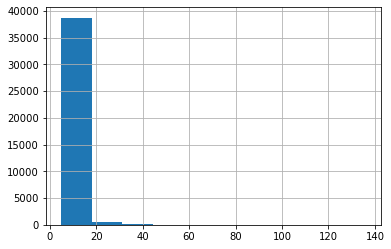

In [105]:
usersDF.hist()

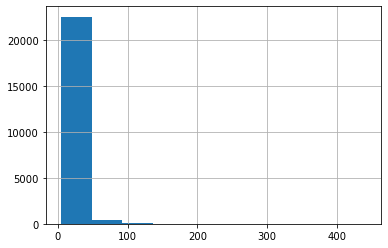

In [106]:
# filename=DATA_DIR+FILE_NAME
# df=sqlContext.read.json(filename)

productDF = df.groupby(['asin'])['reviewText'].count()
productDF.hist()

# df=sqlContext.read.parquet(data_dir/NY.parquet)

In [19]:
df.show(5)

+--------+--------------------+----------+----------+--------------------+-----------------+--------------------+-------+--------------------+----+--------------------+--------+------+--------------------+------------+-----+-----+--------------------+
|also_buy|           also_view|      asin|     brand|            category|             date|         description|details|             feature| fit|               image|main_cat| price|                rank|similar_item|tech1|tech2|               title|
+--------+--------------------+----------+----------+--------------------+-----------------+--------------------+-------+--------------------+----+--------------------+--------+------+--------------------+------------+-----+-----+--------------------+
|    null|                null|0000037214|Big Dreams|[Clothing, Shoes ...|5 star5 star (0%)|[6" long, stretch...|   null|[3 layers of tull...|null|                null|    null|  null|19,963,069inCloth...|        null| null| null|Purple Sequin 

In [76]:
df.printSchema()

root
 |-- also_buy: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- also_view: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- asin: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- category: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- date: string (nullable = true)
 |-- description: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- details: string (nullable = true)
 |-- feature: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- fit: string (nullable = true)
 |-- image: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- main_cat: string (nullable = true)
 |-- price: string (nullable = true)
 |-- rank: string (nullable = true)
 |-- similar_item: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- asin: string (nullable = true)
 |    |    |-- features: struct (nullabl

In [26]:
main_cat.show()

+--------------------+
|            main_cat|
+--------------------+
|       Entertainment|
|           Computers|
|     All Electronics|
|    GPS & Navigation|
|Home Audio & Theater|
|        Pet Supplies|
|                null|
|        Toys & Games|
|                Baby|
|   Sports & Outdoors|
|             Grocery|
|         Video Games|
|   Collectible Coins|
|          Automotive|
|       Luxury Beauty|
|               Books|
|         Amazon Home|
|Industrial & Scie...|
|Health & Personal...|
|Cell Phones & Acc...|
+--------------------+
only showing top 20 rows



In [78]:
df.groupBy('main_cat').count().show()

+--------------------+-------+
|            main_cat|  count|
+--------------------+-------+
|       Entertainment|     31|
|           Computers|   1155|
|     All Electronics|    461|
|    GPS & Navigation|      3|
|Home Audio & Theater|    163|
|        Pet Supplies|     81|
|        Toys & Games|  24327|
|                null|2471831|
|                Baby|   7213|
|   Sports & Outdoors| 116135|
|             Grocery|    147|
|         Video Games|    168|
|   Collectible Coins|      2|
|          Automotive|   3716|
|       Luxury Beauty|      2|
|               Books|  12924|
|         Amazon Home|  21666|
|Industrial & Scie...|   2189|
|Health & Personal...|   6886|
|Cell Phones & Acc...|    407|
+--------------------+-------+
only showing top 20 rows



In [55]:
rddf = ndf.rdd.map(lambda row: (row['main_cat'], row))
# rddf.rdd.map(lambda row: unpackArray(row['Values'],np.float16))
rddf.collect()
# data=rddf.rdd.map(lambda row: unpackArray(row['Values'],np.float16))


[('Entertainment',
  Row(also_buy=None, also_view=None, asin='B001ED9KC6', brand='Disney', category=['Clothing, Shoes & Jewelry', 'Girls', 'Jewelry', 'Brooches & Pins'], date=None, description=None, details='\n  <div class="content">\n\n\n\n\n\n\n\n<ul>\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n                                                                                \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n  \n\n\n<li><b>ASIN:</b> B001ED9KC6</li>\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n  \n  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<li><b>Average Customer Review:</b> \n\n\n\n\n<span class="dpProductDetailB001ED9KC6">\n  <span class="a-declarative" data-action="a-popover" data-a-popover="{&quot;closeButton&quot;:&quot;false&quot;,&quot;max-width&quot;:&quot;700&quot;,&quot;position&quot;:&quot;triggerBottom&quot;,&quot;url&quot;:&quot;/review/widgets/average-customer-review/popover/ref=acr_dpproductdetail_popover?ie=UTF8&amp;asin=

In [45]:
sorted(mdf.groupBy(mdf.asin).count().collect())
mdf.asin
UnDef=np.array(rdd0.map(lambda row:sum(np.isnan(row))).sample(False,0.01).collect())
    flat=rdd0.flatMap(lambda v:list(v)).filter(lambda x: not np.isnan(x)).cache()
    count,S1,S2=flat.map(lambda x: np.float64([1,x,x**2]))\
                  .reduce(lambda x,y: x+y)

Column<b'asin'>

In [71]:
filename=DATA_DIR+'/category/'+'/%s.parquet'%'Entertainment'
df_in=sqlContext.read.parquet(filename)
df_in.show()

+--------------------+
|            main_cat|
+--------------------+
|Portable Audio & ...|
|Cell Phones & Acc...|
|Tools & Home Impr...|
|Industrial & Scie...|
|Health & Personal...|
|Arts, Crafts & Se...|
|Home Audio & Theater|
| Musical Instruments|
|   Collectible Coins|
|   Sports & Outdoors|
|    GPS & Navigation|
|     Car Electronics|
|     Office Products|
|     All Electronics|
|      Amazon Devices|
|      Camera & Photo|
|       Entertainment|
|       Luxury Beauty|
|        Pet Supplies|
|                null|
+--------------------+
only showing top 20 rows



In [ ]:
for meas in measurements:
    t=time()
    Query="SELECT * FROM reviews\n\tWHERE measurement = '%s'"%(meas)
    mdf = sqlContext.sql(Query)
    print(meas,': shape of mdf is ',mdf.count())

In [ ]:

from numpy import linalg as LA
import numpy as np

from numpy_pack import packArray,unpackArray
from spark_PCA import computeCov
from time import time

def computeStatistics(sqlContext,df):
    """Compute all of the statistics for a given dataframe
    Input: sqlContext: to perform SQL queries
            df: dataframe with the fields 
            Station(string), Measurement(string), Year(integer), Values (byteArray with 365 float16 numbers)
    returns: STAT, a dictionary of dictionaries. First key is measurement, 
             second keys described in computeStats.STAT_Descriptions
    """

    sqlContext.registerDataFrameAsTable(df,'weather')
    STAT={}  # dictionary storing the statistics for each measurement
    measurements=['TMAX', 'SNOW', 'SNWD', 'TMIN', 'PRCP', 'TOBS']
    
    for meas in measurements:
        t=time()
        Query="SELECT * FROM weather\n\tWHERE measurement = '%s'"%(meas)
        mdf = sqlContext.sql(Query)
        print(meas,': shape of mdf is ',mdf.count())

        data=mdf.rdd.map(lambda row: unpackArray(row['Values'],np.float16))

        #Compute basic statistics
        STAT[meas]=computeOverAllDist(data)   # Compute the statistics 

        # compute covariance matrix
        OUT=computeCov(data)

        #find PCA decomposition
        eigval,eigvec=LA.eig(OUT['Cov'])

        # collect all of the statistics in STAT[meas]
        STAT[meas]['eigval']=eigval
        STAT[meas]['eigvec']=eigvec
        STAT[meas].update(OUT)

        print('time for',meas,'is',time()-t)
    
    return STAT

# Compute the overall distribution of values and the distribution of the number of nan per year
def find_percentiles(SortedVals,percentile):
    L=int(len(SortedVals)/percentile)
    return SortedVals[L],SortedVals[-L]
  
def computeOverAllDist(rdd0):
    UnDef=np.array(rdd0.map(lambda row:sum(np.isnan(row))).sample(False,0.01).collect())
    flat=rdd0.flatMap(lambda v:list(v)).filter(lambda x: not np.isnan(x)).cache()
    count,S1,S2=flat.map(lambda x: np.float64([1,x,x**2]))\
                  .reduce(lambda x,y: x+y)
    mean=S1/count
    std=np.sqrt(S2/count-mean**2)
    Vals=flat.sample(False,0.0001).collect()
    SortedVals=np.array(sorted(Vals))
    low100,high100=find_percentiles(SortedVals,100)
    low1000,high1000=find_percentiles(SortedVals,1000)
    return {'UnDef':UnDef,\
          'mean':mean,\
          'std':std,\
          'SortedVals':SortedVals,\
          'low100':low100,\
          'high100':high100,\
          'low1000':low100,\
          'high1000':high1000
          }

# description of data returned by computeOverAllDist
STAT_Descriptions=[
('SortedVals', 'Sample of values', 'vector whose length varies between measurements'),
 ('UnDef', 'sample of number of undefs per row', 'vector whose length varies between measurements'),
 ('mean', 'mean value', ()),
 ('std', 'std', ()),
 ('low100', 'bottom 1%', ()),
 ('high100', 'top 1%', ()),
 ('low1000', 'bottom 0.1%', ()),
 ('high1000', 'top 0.1%', ()),
 ('E', 'Sum of values per day', (365,)),
 ('NE', 'count of values per day', (365,)),
 ('Mean', 'E/NE', (365,)),
 ('O', 'Sum of outer products', (365, 365)),
 ('NO', 'counts for outer products', (365, 365)),
 ('Cov', 'O/NO', (365, 365)),
 ('Var', 'The variance per day = diagonal of Cov', (365,)),
 ('eigval', 'PCA eigen-values', (365,)),
 ('eigvec', 'PCA eigen-vectors', (365, 365))
]




In [35]:
df['datetime'] = df['unixReviewTime'].map(lambda x: datetime.fromtimestamp(x))
df['year'] = df['datetime'].map(lambda x: x.year)
df['month'] = df['datetime'].map(lambda x: x.month)
df['day'] = df['datetime'].map(lambda x: x.day)
df['hour'] = df['datetime'].map(lambda x: x.hour)
    

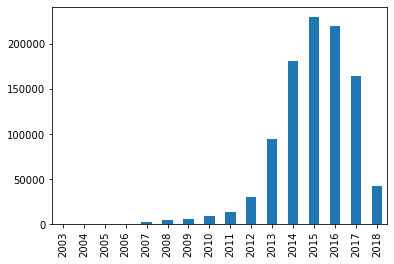

In [56]:
df.year.value_counts(sort=False).plot.bar()

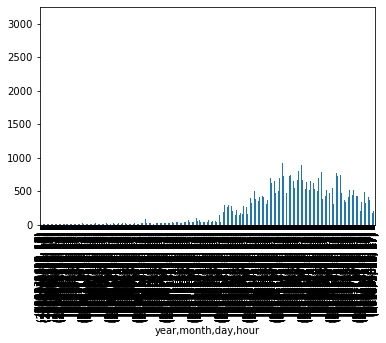

In [62]:
# df.year.value_counts(sort=False).plot.bar()
df.groupby(['year', 'month', 'day', 'hour'])['unixReviewTime'].count().plot.bar()

In [92]:
# df_with_image = df[df['image'].isnull() == False]
df_with_image['image'].iloc[2]

['https://images-na.ssl-images-amazon.com/images/I/61rgkgvCFZL._SY88.jpg',
 'https://images-na.ssl-images-amazon.com/images/I/61W4CUrvGGL._SY88.jpg',
 'https://images-na.ssl-images-amazon.com/images/I/71m0NT81YnL._SY88.jpg',
 'https://images-na.ssl-images-amazon.com/images/I/71fOeEfN8dL._SY88.jpg']

In [ ]:
# ./MyMediaLite/bin/rating_prediction --recommender=BiasedMatrixFactorization --training-file=./data/Clothing_Shoes_and_Jewelry.csv --test-ratio=0.1

# ./MyMediaLite/bin/
# ./rating_prediction --training-file=../../data/Clothing_Shoes_and_Jewelry.csv --recommender=BiasedMatrixFactorization --test-ratio=0.1

# ./mymedialite/bin/rating_prediction --training-file="../../data/Clothing_Shoes_and_Jewelry.csv" --recommender=BiasedMatrixFactorization --test-ratio=0.1
# ./mymedialite/bin/rating_prediction --training-file="../../data/Clothing_Shoes_and_Jewelry.csv" --recommender=BiasedMatrixFactorization
 

In [125]:
from neo4j import GraphDatabase

host = "bolt://localhost:11007" # replace this with your Sandbox host
password = "password" # replace this with your Sandbox password

driver = GraphDatabase.driver(host, auth=("neo4j", "password"))
